In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


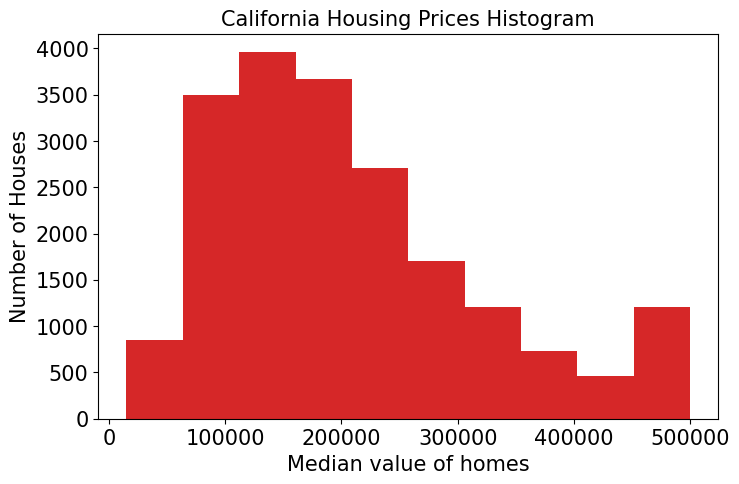

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df['median_house_value'], color = 'Tab:red')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of homes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

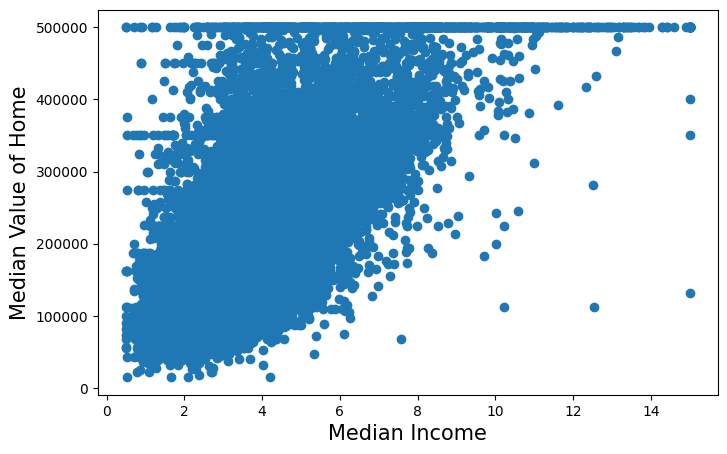

In [76]:
plt.figure(figsize = (8, 5))
plt.scatter(x = df['median_income'], y = df['median_house_value'], color = 'Tab:blue')
plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('Median Value of Home', fontsize = 15)
plt.show()

In [77]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [78]:
features_names = df.columns.to_list()[:-1]
X = df[features_names] # features
Y = df['median_house_value'] # response or target variable

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [80]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [81]:
pred = my_linear_regression.predict(X_test)
pred

array([251347.23196202,  66700.3451833 , 105042.4562009 , ...,
       320302.54356955,  61471.33576644, 299086.18631992])

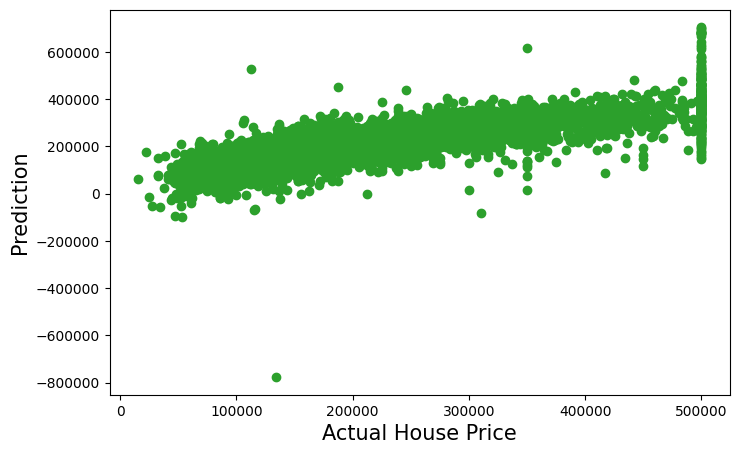

In [82]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [83]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.6401549846633445


In [85]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -3361263.4608528726
The coef (b_1) is  0.8912800982923328
The coef (b_2) is  -40858.91627299241
The coef (b_3) is  -42662.668143851864
The coef (b_4) is  1145.7723585185624
The coef (b_5) is  -7.250036221357732
The coef (b_6) is  107.32725988782931
The coef (b_7) is  -43.12893881005584
The coef (b_8) is  61.23441119415929
The coef (b_9) is  40140.74628658999


In [86]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(Y_test, pred)*100, "%")

Mean Absolute Error: 50320.82616860233
Mean Squared Error: 4836018152.499041
Root Mean Squared Error: 69541.48511858976
MAPE: 29.658795519400694 %


In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [88]:
df_norm.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.000000,0.229084,0.513284,0.509804,0.102359,0.102421,0.042994,0.099490,0.421277,0.679793
1,0.000059,0.602590,0.182784,0.823529,0.039752,0.047952,0.022590,0.045387,0.213728,0.332990
2,0.000118,0.651394,0.131775,0.509804,0.094556,0.078523,0.041509,0.081237,0.365064,0.526804
3,0.000176,0.596614,0.136026,0.529412,0.001713,0.002173,0.001289,0.001644,0.388684,0.649484
4,0.000235,0.466135,0.402763,0.352941,0.032661,0.037709,0.023739,0.038809,0.168108,0.137527


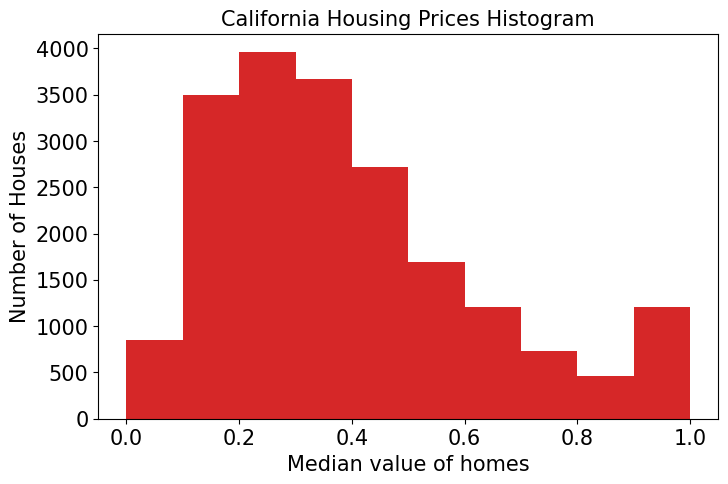

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df_norm.median_house_value, color = 'Tab:red')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of homes', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [92]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features_names] # features
Y = df_norm['median_house_value'] # response or target variable
my_linear_regression.fit(X, Y)

LinearRegression()

In [93]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,Unnamed: 0,0.032789
1,longitude,-0.852010
2,latitude,-0.829698
3,housing_median_age,0.119466
4,total_rooms,-0.637986
5,total_bedrooms,1.500604
6,population,-2.814670
7,households,0.601394
8,median_income,1.204153


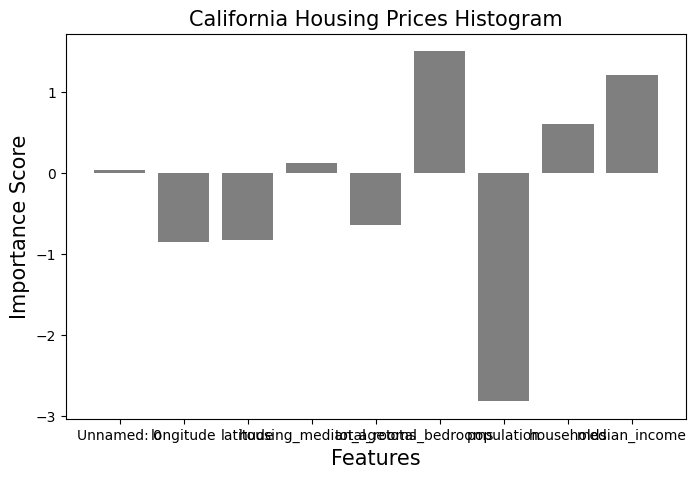

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:gray') 
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()